STEP 1-Importing the necessary libraries 

In [31]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading the dataset

In [32]:
weather_data=pd.read_csv("weather_forecast.csv")

In [33]:
weather_data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [34]:
weather_data.tail()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,20170424-18:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [35]:
weather_data.dtypes

datetime_utc     object
 _conds          object
 _dewptm        float64
 _fog             int64
 _hail            int64
 _heatindexm    float64
 _hum           float64
 _precipm       float64
 _pressurem     float64
 _rain            int64
 _snow            int64
 _tempm         float64
 _thunder         int64
 _tornado         int64
 _vism          float64
 _wdird         float64
 _wdire          object
 _wgustm        float64
 _windchillm    float64
 _wspdm         float64
dtype: object

Pandas to_datetime() method helps to convert string Date time into Python Date time object.

In [36]:
weather_data['datetime_utc']=pd.to_datetime(weather_data['datetime_utc'])

The set_index() function is used to set the DataFrame index using existing columns.

Set the DataFrame index (row labels) using one or more existing columns or arrays of the correct length. The index can replace the existing index or expand on it. datetime_utc has date and time. As we are concentrating on only date setting the datetime_utc column as index and resampling it.

In [37]:
weather_data.set_index('datetime_utc',inplace=True)

In [38]:
weather_data

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-24 06:00:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
2017-04-24 09:00:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
2017-04-24 12:00:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5


Resampling is necessary when you’re given a data set recorded in some time interval and you want to change the time interval to something else. For example, you could aggregate monthly data into yearly data, or you could upsample hourly data into minute-by-minute data.

In [39]:
weather_data=weather_data.resample('D').mean()

In [40]:
weather_data

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,NaN,52.916667,NaN,-2659.666667,0.0,0.0,22.333333,0.0,0.0,2.250000,23.333333,NaN,NaN,2.466667
1996-11-02,10.458333,0.0,0.0,NaN,48.625000,NaN,1009.833333,0.0,0.0,22.916667,0.0,0.0,3.476190,106.666667,NaN,NaN,8.028571
1996-11-03,12.041667,0.0,0.0,26.80,55.958333,NaN,1010.500000,0.0,0.0,21.791667,0.0,0.0,2.286364,106.666667,NaN,NaN,4.804545
1996-11-04,10.222222,0.0,0.0,27.50,48.055556,NaN,1011.333333,0.0,0.0,22.722222,0.0,0.0,2.326667,55.555556,NaN,NaN,1.964706
1996-11-05,8.200000,0.0,0.0,NaN,29.400000,NaN,1011.800000,0.0,0.0,27.800000,0.0,0.0,3.900000,208.000000,NaN,NaN,10.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-20,16.750000,0.0,0.0,NaN,27.500000,NaN,998.625000,0.0,0.0,34.500000,0.0,0.0,2.500000,216.666667,NaN,NaN,5.562500
2017-04-21,21.500000,0.0,0.0,NaN,39.375000,NaN,999.875000,0.0,0.0,34.250000,0.0,0.0,2.000000,92.500000,NaN,NaN,6.962500
2017-04-22,20.400000,0.0,0.0,38.05,40.900000,NaN,1001.600000,0.0,0.0,32.900000,0.2,0.0,1.950000,113.750000,NaN,NaN,8.890000


For time series analysis,we are interested about two columns i.e., date(datetime_utc) and temperature(_tempm). So let us concentrate only on them.

If we want to select a single column and want a DataFrame containing just the single column, we need to use [[]], double square bracket with a single column name inside it.

In [41]:
weather_data=weather_data[[' _tempm']]

In [42]:
type(weather_data[[' _tempm']])

pandas.core.frame.DataFrame

In [43]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7480 entries, 1996-11-01 to 2017-04-24
Freq: D
Data columns (total 1 columns):
 _tempm    7336 non-null float64
dtypes: float64(1)
memory usage: 116.9 KB


Finding missing values

In [44]:
weather_data.isnull().any()

 _tempm    True
dtype: bool

Finding the row having null value and filling the null row

In [45]:
weather_data[' _tempm'].fillna(weather_data[' _tempm'].mean(), inplace=True)

C:\Users\Ifrah Fatima\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [46]:
weather_data.head()

,_tempm
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000


Pandas Series.reset_index() function generate a new DataFrame or Series with the index reset.
This comes handy when index is need to be used as a column.


In [47]:
weather_data.reset_index(inplace=True)

For this univariate analysisProphet expects the dataset to have two columns named as ds and y. ds is the date column while y is the column that we are forecasting. so let us rename them

In [48]:
weather_data.rename(columns={'datetime_utc':'ds',' _tempm':'y'}, inplace=True)

C:\Users\Ifrah Fatima\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [49]:
weather_data.head()

,ds,y
0,1996-11-01,22.333333
1,1996-11-02,22.916667
2,1996-11-03,21.791667
3,1996-11-04,22.722222
4,1996-11-05,27.800000


Visualising the data

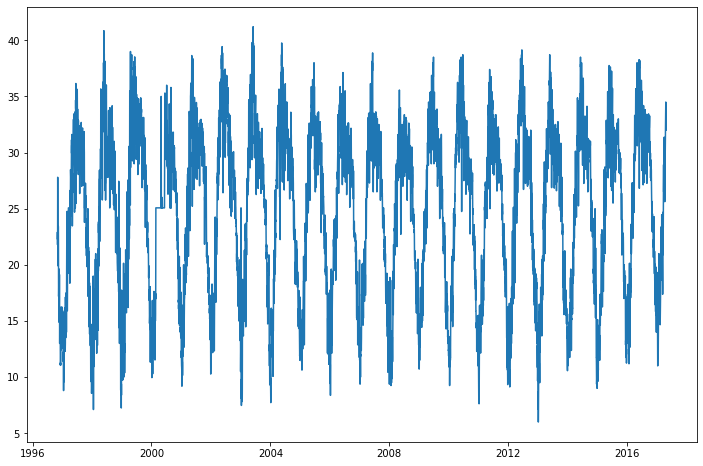

In [50]:
plt.figure(figsize=(12,8))
plt.plot(weather_data.set_index(["ds"]))

# Model Fitting

The API implementation for Prophet and Scikit-learn are very similar as we’ll see below. We start by creating an instance of the Prophet class and then fit it to our dataset.

In [51]:
model=Prophet()
model.fit(weather_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Making Future Predictions

The next step is to prepare our model to make future predictions. This is achieved using the Prophet.make_future_dataframe method and passing the number of days we’d like to predict in the future. We use the periods attribute to specify this. This also include the historical dates. We’ll use these historical dates to compare the predictions with the actual values in the ds column.

In [52]:
future=model.make_future_dataframe(periods=365, freq="D")
future.tail()

,ds
7840,2018-04-20
7841,2018-04-21
7842,2018-04-22
7843,2018-04-23
7844,2018-04-24


Now, a dataframe having 365 days is created using make_future_dataframe() function of prophet and the model makes forecast in this dataframe.

In [53]:
future.head()

,ds
0,1996-11-01
1,1996-11-02
2,1996-11-03
3,1996-11-04
4,1996-11-05


# Obtaining the Forecasts
We use the predict method to make future predictions. This will generate a dataframe with a yhat column that will contain the predictions.

In [54]:
forecast=model.predict(future)

If we check the head for our forecast dataframe we’ll notice that it has many columns. However, we are mainly interested in ds, yhat, yhat_lower and yhat_upper. yhat is our predicted forecast, yhat_lower is the lower bound for our predictions and yhat_upper is the upper bound for our predictions.

In [55]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-11-01,23.521637,18.178899,24.236653,23.521637,23.521637,-2.256154,-2.256154,-2.256154,-0.062900,-0.062900,-0.062900,-2.193254,-2.193254,-2.193254,0.0,0.0,0.0,21.265483
1,1996-11-02,23.523379,17.922594,24.043303,23.523379,23.523379,-2.360807,-2.360807,-2.360807,0.003322,0.003322,0.003322,-2.364128,-2.364128,-2.364128,0.0,0.0,0.0,21.162573
2,1996-11-03,23.525122,17.730987,24.178418,23.525122,23.525122,-2.547109,-2.547109,-2.547109,-0.011382,-0.011382,-0.011382,-2.535727,-2.535727,-2.535727,0.0,0.0,0.0,20.978013
3,1996-11-04,23.526864,17.589050,24.030910,23.526864,23.526864,-2.715783,-2.715783,-2.715783,-0.007156,-0.007156,-0.007156,-2.708628,-2.708628,-2.708628,0.0,0.0,0.0,20.811080
4,1996-11-05,23.528606,17.528798,23.844615,23.528606,23.528606,-2.905169,-2.905169,-2.905169,-0.021823,-0.021823,-0.021823,-2.883346,-2.883346,-2.883346,0.0,0.0,0.0,20.623437


In [56]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7840,2018-04-20,32.513276,29.238087,35.660631
7841,2018-04-21,32.724116,29.629934,35.783827
7842,2018-04-22,32.853331,29.779703,35.945784
7843,2018-04-23,33.000876,29.966328,36.060885
7844,2018-04-24,33.128920,30.073244,36.209431


In [57]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1996-11-01,21.265483,18.178899,24.236653
1,1996-11-02,21.162573,17.922594,24.043303
2,1996-11-03,20.978013,17.730987,24.178418
3,1996-11-04,20.811080,17.589050,24.030910
4,1996-11-05,20.623437,17.528798,23.844615


# Plotting the Forecasts
Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using mode.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

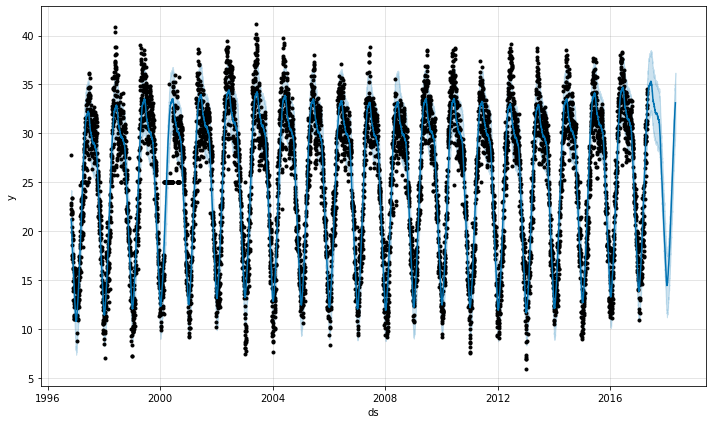

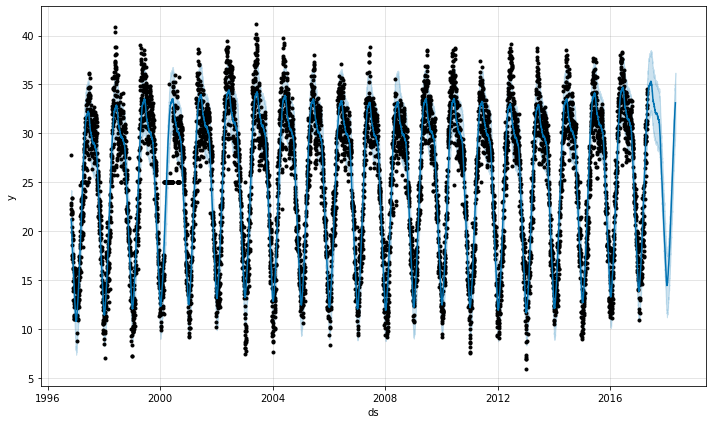

In [58]:
model.plot(forecast)

The actual value and predicted value seems to be pretty similar.Hence the model is working well.

# Plotting the Forecast Components
The plot_components method plots the trend, yearly and weekly seasonality of the time series data.

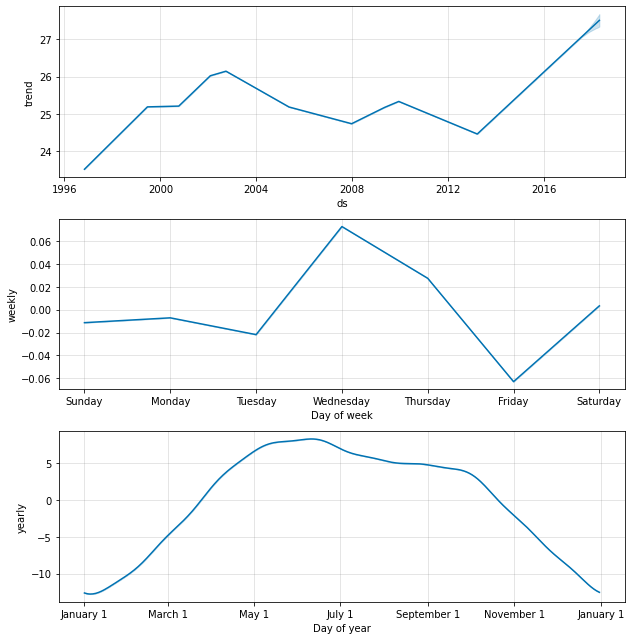

In [59]:
fig = model.plot_components(forecast)

# Cross Validation
The cross_validation method allows us to compare the predicted values with the actual values in Prophet.

In [60]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 36 forecasts with cutoffs between 1999-01-24 00:00:00 and 2016-04-24 00:00:00
C:\Users\Ifrah Fatima\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1999-01-25,13.719397,10.711207,17.022054,13.20,1999-01-24
1,1999-01-26,13.860526,10.722084,17.166042,10.00,1999-01-24
2,1999-01-27,14.041650,10.956338,17.307795,17.75,1999-01-24
3,1999-01-28,14.115146,11.185497,17.312264,11.75,1999-01-24
4,1999-01-29,13.887185,10.651758,17.056643,11.20,1999-01-24


# Obtaining the Performance Metrics
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [61]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,6.853411,2.617902,2.065823,0.100862,0.073711,0.797184
1,38 days,6.851475,2.617532,2.071824,0.101032,0.073711,0.795662
2,39 days,6.882861,2.623521,2.080719,0.101145,0.074131,0.792237
3,40 days,6.925709,2.631674,2.086371,0.101144,0.074186,0.789954
4,41 days,7.032192,2.651828,2.094893,0.100933,0.074186,0.786149


# Visualizing Performance Metrics
The performance Metrics can be visualized using the plot_cross_validation_metric utility. Let’s visualize the RMSE below.

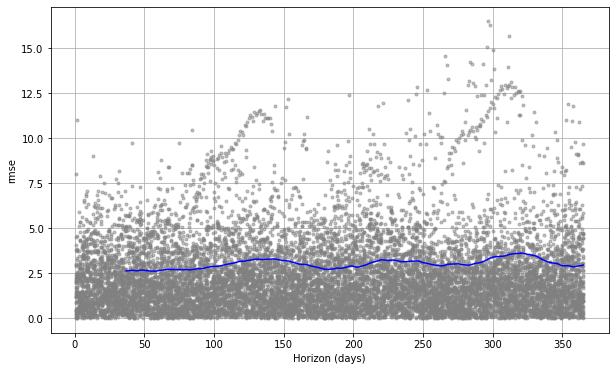

In [62]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

# Saving the model file

In [63]:
import pickle
pickle.dump( model, open( "weather_prediction.pickle", "wb" ) )

In [64]:
!pip install jupyterthemes
import jupyterthemes as jt

  Found existing installation: certifi 2019.9.11
    Uninstalling certifi-2019.9.11:
      Successfully uninstalled certifi-2019.9.11


ERROR: fbprophet 0.6 requires cmdstanpy==0.4, which is not installed.
ERROR: fbprophet 0.6 requires setuptools-git>=1.2, which is not installed.


In [65]:
import jupyterthemes as jt
jupyterthemes -t monokai

SyntaxError: invalid syntax (<ipython-input-65-62855c7ad489>, line 2)

In [66]:
import jupyterthemes as jt

In [67]:
!jt -t monokai